<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Machine_Learning_Confusion_Matrix%EB%A5%BC_%ED%86%B5%ED%95%9C_%EB%AC%B8%EC%9E%90_%EC%9D%B8%EC%8B%9D%EB%A5%A0_%ED%99%95%EC%9D%B8%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

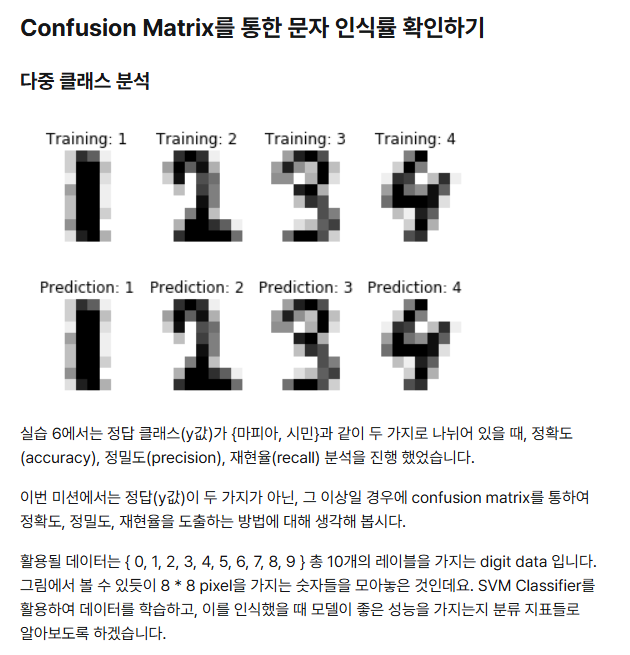

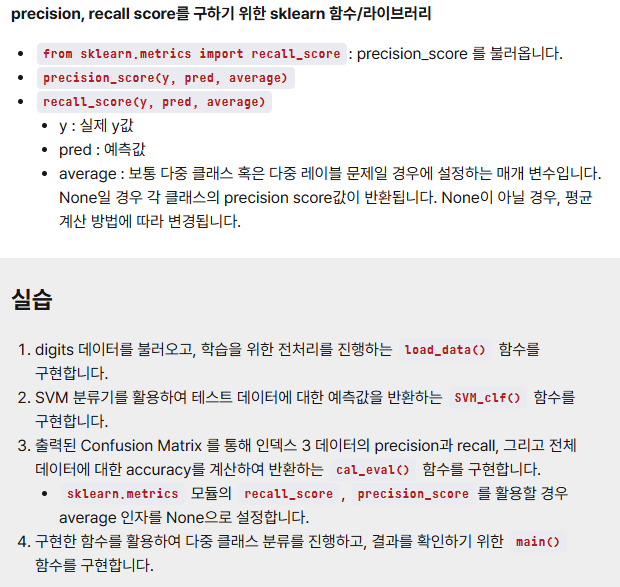

In [ ]:
from elice_utils import EliceUtils
elice_utils = EliceUtils()

from sklearn.model_selection import train_test_split
from draw_image import draw_digit_images
from sklearn.datasets import load_digits

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action = 'ignore')

"""
    1. digits 데이터를 불러오고,
       학습을 위한 전처리를 진행하는
       load_data() 함수를 구현합니다.

       Step01. digits 데이터를 불러옵니다.

       Step02. 데이터를 학습용 데이터와
               테스트용 데이터로 분리합니다.
               (train:80%, test:20%, random_state:100)
"""
def load_data():
    X, y = load_digits(return_X_y=True)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)

    return train_X, test_X, train_y, test_y


"""
    2. SVM 분류기를 활용하여
       테스트 데이터에 대한 예측값을 반환하는
       SVM_clf() 함수를 구현합니다.
"""
def SVM_clf(train_X, test_X, train_y):
    model = SVC()
    pred = model.fit(train_X, train_y).predict(test_X)

    return pred


"""
    3. 출력된 Confusion Matrix 를 통해
       인덱스 3의 precision과 recall,
       그리고 전체 데이터에 대한 accuracy를
       계산하여 반환하는 cal_eval() 함수를 구현합니다.

"""
def cal_eval(test_y, pred):
    cm = confusion_matrix(test_y, pred)
    precision_per_class = precision_score(test_y, pred, average=None)
    recall_per_class = recall_score(test_y, pred, average=None)

    index_3_precision = precision_per_class[3]
    index_3_recall = recall_per_class[3]

    accuracy = accuracy_score(test_y, pred)

    return index_3_precision, index_3_recall, accuracy

"""
    4. 구현한 함수를 활용하여 다중 클래스 분류를 진행하고,
       결과를 확인하기 위한 main() 함수를 구현합니다.
"""
def main():
    train_X, test_X, train_y, test_y = load_data()

    pred = SVM_clf(train_X, test_X, train_y)


    # 학습된 모델로 digit data가 제대로 예측 됐는 지
    # 확인하기위한 confusion matrix를 호출합니다.
    print("Confusion matrix results :\n\t- row : real(test_y) 0 ~ 9 label\n\t- column : predicted 0 ~ 9 label\n\n%s\n"  % confusion_matrix(test_y, pred))

    index_3_precision, index_3_recall, accuracy = cal_eval(test_y, pred)

    print("index 3의 recall : %f" % index_3_recall)
    print("index 3의 precision : %f" % index_3_precision)
    print("전체 accuracy : %f" % accuracy)

    # 랜덤으로 뽑은 4개의 데이터를 학습된 모델로
    # 제대로 예측 했는 지 시각화 합니다.
    draw_digit_images(test_X, test_y, pred)

if __name__ == "__main__":
    main()

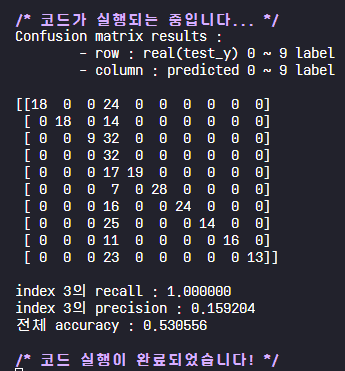

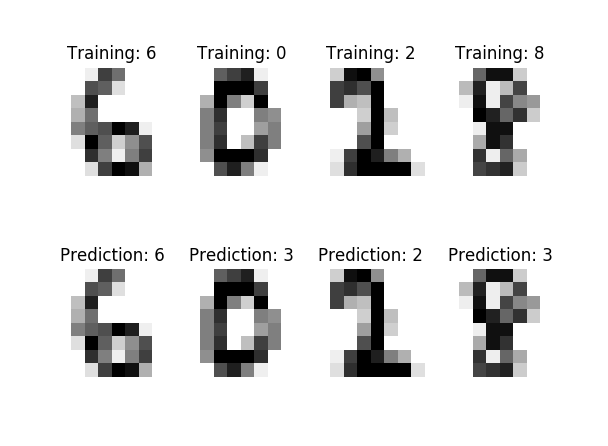